# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

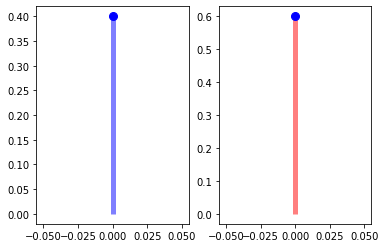

In [35]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2)
#Como es un experimento con variable aleatoria que mide el número de éxitos en un experimento 
#con 2 posibilidades , ya sea éxito o fracaso.

#definimos p para 1, donde la probabilidad de que salga manzana del contenedor es 
p=6/10
#calculando el primer momento 
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
#definimos la función de densidad discreta bernoulli.pmf(k,p,loc)
#Definimos x para la distribución
x = np.arange(bernoulli.ppf(0.01, p),bernoulli.ppf(0.99, p))
#colacando la probabilidad discreta
ax[0].plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax[0].vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

#definiendo p para 2, donde la probabilidad que salga una naranja dentro del contenedor
p=4/10
ax[1].plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax[1].vlines(x, 0, bernoulli.pmf(x, p), colors='r', lw=5, alpha=0.5)


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [48]:
# your code here
# Como la distribución de Bernoulli es por ensayo y en el mismo problema te menciona que hay un reemplazo, lo que haremos
#hacer una multiplicación de las probabilidades por cada ensayo.
# La probabilidad que las primeras 5 frutas sean manzanas después de elegir aleatoria una muestra siguiendo la proporcion es
#la siguiente
p_f_manzanas=(12/20)**5
p_f_manzanas_oranges=(12/20)**5*((8/20)**15)

print('Recordad que si hay remplazo')
print('La probabilidad que las primeras 5 frutas sean manzanas:',p_f_manzanas)
print('La probabilidad que las primeras 5 frutas sean manzanas y después 15 naranjas:',p_f_manzanas_oranges)


Recordad que si hay remplazo
La probabilidad que las primeras 5 frutas sean manzanas: 0.07775999999999998
La probabilidad que las primeras 5 frutas sean manzanas y después 15 naranjas: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [47]:
# your code here
from scipy.stats import binom
#como no importa el orden podemos resolverlo mediante una distrbucion binomial donde  binom.pmf(k, n, p, loc)
#Probabilidad de que haya 5 manzanas y 15 naranjas
#Suponiendo que se va sacando fruta por fruta hasta llegar a 20 

#--------Manzanas----------#
n=20
k=5
p_apples=(.6)

probA = binom.cdf(k, n, p_apples)

#----Naranjas-----------#
n=20
k=15
p_naranjas=(.4)
probB = binom.cdf(k, n, p_naranjas)

#Multiplicamos los eventos por los axiomas de la probabilidad
prob=probA*probB

print('La probabilidad es de:',prob)


La probabilidad es de: 0.0016110137399917822


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [51]:
# your code here
#la probabilidad de que p(x >=5) -- dist Binomial
n=20
k=5
p_naranjas=(5/20)
prob_ = binom.cdf(k, n, p_naranjas)
prob_

0.6171726543871044

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

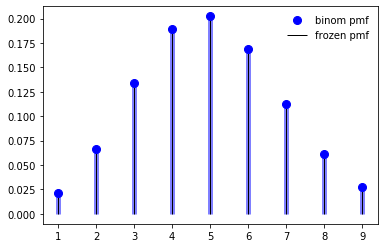

In [53]:
# your code here
# Please label the axes and give a title to the plot 

from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 20, (5/20)
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()



## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [56]:
# your code here 
#Podemos asumir una probabilidad de Poisson: 
#k es el número de ocurrencias del evento o fenómeno 
#n es un parámetro positivo que representa el número de veces que se espera que ocurra 
#el fenómeno durante un intervalo dado, en este ejemplo es la media
#Usando poisson.pmf(k, mu)
from scipy.stats import poisson
probabilidad=poisson.pmf(5, 2.3)
probabilidad

0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

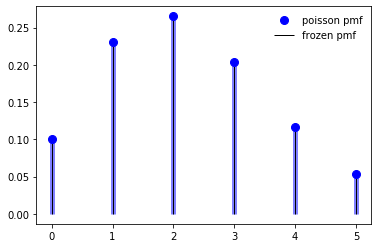

In [60]:
# your code here
# Please label the axes and give a title to the plot 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = 2.3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()